In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

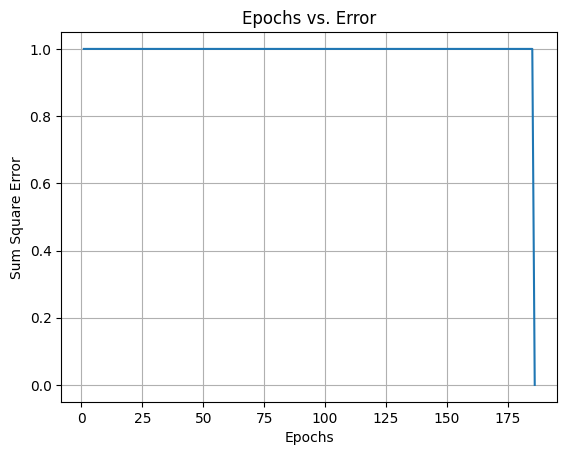

Testing AND gate logic:
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 1
Number of epochs needed for convergence: 186


In [21]:
'''A1. Develop the above perceptron in your own code (dont use the perceptron model available from package). Use the initial weights as 
provided below. 
W0 = 10, W1 = 0.2, w2 = -0.75, learning rate (α) = 0.05
Use Step activation function to learn the weights of the network to implement above provided AND gate logic. The activation function is 
demonstrated below.'''


w1 = 10
w2 = 0.2
bias = -0.75
learning_rate = 0.05


def step_activation(y):
    return 1 if y >= 0 else 0

def train_perceptron(inputs, targets, weights, bias, learning_rate, max_epochs, convergence_threshold):
    error_history = [] 
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(inputs)):
            weighted_sum = bias + weights[0] * inputs[i][0] + weights[1] * inputs[i][1]
            prediction = step_activation(weighted_sum)
            error = targets[i] - prediction
            total_error += error ** 2
            weights[0] += learning_rate * error * inputs[i][0]
            weights[1] += learning_rate * error * inputs[i][1]
        error_history.append(total_error)
        if total_error <= convergence_threshold:
            break
    return error_history

and_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_targets = np.array([0, 0, 0, 1])

weights = [w1, w2]

convergence_threshold = 0.002
max_epochs = 1000

error_history = train_perceptron(and_inputs, and_targets, weights, bias, learning_rate, max_epochs, convergence_threshold)

plt.plot(range(1, len(error_history) + 1), error_history)
plt.xlabel('Epochs')
plt.ylabel('Sum Square Error')
plt.title('Epochs vs. Error')
plt.grid(True)
plt.show()

print("Testing AND gate logic:")
for i in range(len(and_inputs)):
    weighted_sum = bias + weights[0] * and_inputs[i][0] + weights[1] * and_inputs[i][1]
    prediction = step_activation(weighted_sum)
    print(f"Input: {and_inputs[i]}, Prediction: {prediction}")

print(f"Number of epochs needed for convergence: {len(error_history)}")


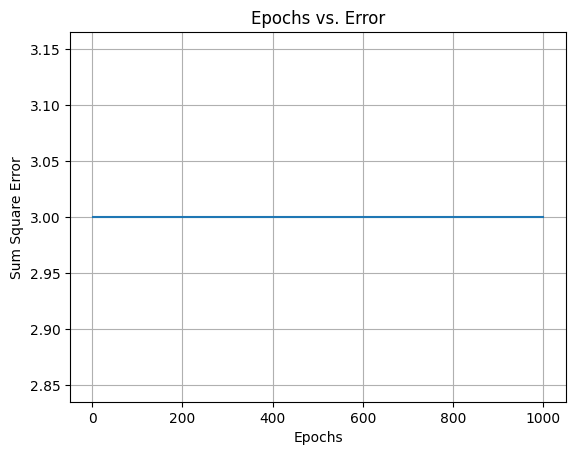

Testing AND gate logic with Bi-Polar Step function:
Input: [0 0], Prediction: -1
Input: [0 1], Prediction: -1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 1
Number of epochs needed for convergence with Bi-Polar Step function: 1000 ,still not got corrrect outputs


In [22]:
'''A2. Repeat the above A1 experiment with following activation functions. Compare the iterations 
taken to converge against each of the activation functions. Keep the learning rate same as A1.
• Bi-Polar Step function
• Sigmoid function
• ReLU function
'''
def step_activation_bipolar(y):
    if y>0:
        return 1
    elif (y==0):
        return 0
    elif y<0:
        return -1

w1 = 10
w2 = 0.2
bias = -0.75
learning_rate = 0.05

def train_perceptron(inputs, targets, weights, bias, learning_rate, max_epochs, convergence_threshold):
    error_history = [] 
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(inputs)):
            weighted_sum = bias + weights[0] * inputs[i][0] + weights[1] * inputs[i][1]
            prediction = step_activation_bipolar(weighted_sum)
            error = targets[i] - prediction
            total_error += error ** 2
            weights[0] += learning_rate * error * inputs[i][0]
            weights[1] += learning_rate * error * inputs[i][1]
        error_history.append(total_error)
        if total_error <= convergence_threshold:
            break
    return error_history

and_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_targets = np.array([0, 0, 0, 1])

weights = [w1, w2]

convergence_threshold = 0.002
max_epochs = 1000

error_history = train_perceptron(and_inputs, and_targets, weights, bias, learning_rate, max_epochs, convergence_threshold)

plt.plot(range(1, len(error_history) + 1), error_history)
plt.xlabel('Epochs')
plt.ylabel('Sum Square Error')
plt.title('Epochs vs. Error')
plt.grid(True)
plt.show()

print("Testing AND gate logic with Bi-Polar Step function:")
for i in range(len(and_inputs)):
    weighted_sum = bias + weights[0] * and_inputs[i][0] + weights[1] * and_inputs[i][1]
    prediction = step_activation_bipolar(weighted_sum)
    print(f"Input: {and_inputs[i]}, Prediction: {prediction}")

print(f"Number of epochs needed for convergence with Bi-Polar Step function: {len(error_history)} ,still not got corrrect outputs")

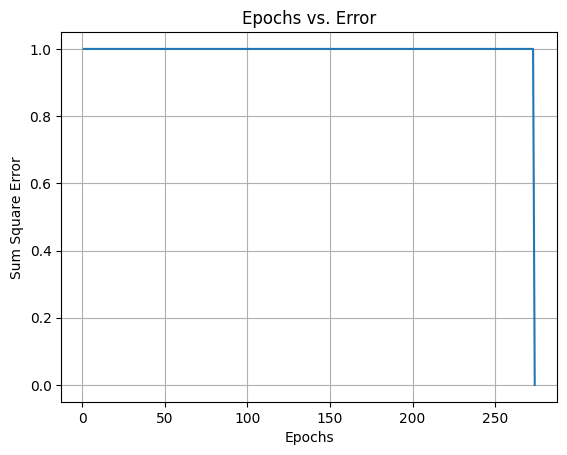

Testing AND gate logic with Sigmoid function:
Input: [0 0], Prediction: 0.0
Input: [0 1], Prediction: 0.0
Input: [1 0], Prediction: 0.0
Input: [1 1], Prediction: 1.0
Number of epochs needed for convergence with Sigmoid function: 274 


In [23]:
import math

def step_activation_sigmoid(y):
    return (1 // (1 + (math.e)**(-y)))

w1 = 10
w2 = 0.2
bias = -0.75
learning_rate = 0.05

def train_perceptron(inputs, targets, weights, bias, learning_rate, max_epochs, convergence_threshold):
    error_history = [] 
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(inputs)):
            weighted_sum = bias + weights[0] * inputs[i][0] + weights[1] * inputs[i][1]
            prediction = step_activation_sigmoid(weighted_sum)
            error = targets[i] - prediction
            total_error += error ** 2
            weights[0] += learning_rate * error * inputs[i][0]
            weights[1] += learning_rate * error * inputs[i][1]
        error_history.append(total_error)
        if total_error <= convergence_threshold:
            break
    return error_history

and_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_targets = np.array([0, 0, 0, 1])

weights = [w1, w2]

convergence_threshold = 0.002
max_epochs = 1000

error_history = train_perceptron(and_inputs, and_targets, weights, bias, learning_rate, max_epochs, convergence_threshold)

plt.plot(range(1, len(error_history) + 1), error_history)
plt.xlabel('Epochs')
plt.ylabel('Sum Square Error')
plt.title('Epochs vs. Error')
plt.grid(True)
plt.show()

print("Testing AND gate logic with Sigmoid function:")
for i in range(len(and_inputs)):
    weighted_sum = bias + weights[0] * and_inputs[i][0] + weights[1] * and_inputs[i][1]
    prediction = step_activation_sigmoid(weighted_sum)
    print(f"Input: {and_inputs[i]}, Prediction: {prediction}")

print(f"Number of epochs needed for convergence with Sigmoid function: {len(error_history)} ")

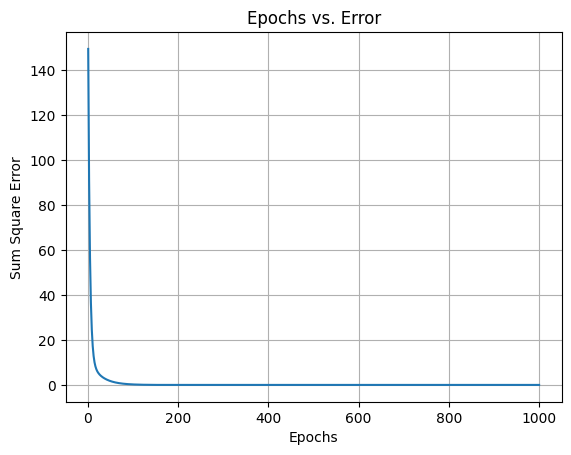

Testing AND gate logic with ReLU function:
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0.08620689655172287
Input: [1 0], Prediction: 0.08620689655172475
Input: [1 1], Prediction: 0.9224137931034476
Number of epochs needed for convergence with ReLU function: 1000 , still not got exact corrrect outputs


In [24]:
import math

def step_activation_relu(y):
    if y>0:
        return y
    else:
        return 0

w1 = 10
w2 = 0.2
bias = -0.75
learning_rate = 0.05

def train_perceptron(inputs, targets, weights, bias, learning_rate, max_epochs, convergence_threshold):
    error_history = [] 
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(inputs)):
            weighted_sum = bias + weights[0] * inputs[i][0] + weights[1] * inputs[i][1]
            prediction = step_activation_relu(weighted_sum)
            error = targets[i] - prediction
            total_error += error ** 2
            weights[0] += learning_rate * error * inputs[i][0]
            weights[1] += learning_rate * error * inputs[i][1]
        error_history.append(total_error)
        if total_error <= convergence_threshold:
            break
    return error_history

and_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_targets = np.array([0, 0, 0, 1])

weights = [w1, w2]

convergence_threshold = 0.002
max_epochs = 1000

error_history = train_perceptron(and_inputs, and_targets, weights, bias, learning_rate, max_epochs, convergence_threshold)

plt.plot(range(1, len(error_history) + 1), error_history)
plt.xlabel('Epochs')
plt.ylabel('Sum Square Error')
plt.title('Epochs vs. Error')
plt.grid(True)
plt.show()

print("Testing AND gate logic with ReLU function:")
for i in range(len(and_inputs)):
    weighted_sum = bias + weights[0] * and_inputs[i][0] + weights[1] * and_inputs[i][1]
    prediction = step_activation_relu(weighted_sum)
    print(f"Input: {and_inputs[i]}, Prediction: {prediction}")

print(f"Number of epochs needed for convergence with ReLU function: {len(error_history)} , still not got exact corrrect outputs")

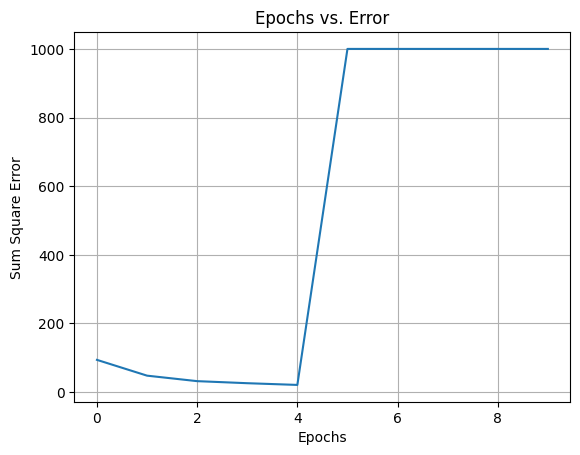

Testing AND gate logic:
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 1
Number of epochs needed for convergence: [94, 48, 32, 26, 21, 1000, 1000, 1000, 1000, 1000]


In [25]:
'''A3. Repeat exercise A1 with varying the learning rate, keeping the initial weights same. Take learning 
rate = {0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1}. Make a plot of the number of iterations taken for 
learning to converge against the learning rates'''


w1 = 10
w2 = 0.2
bias = -0.75
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]


def step_activation(y):
    return 1 if y >= 0 else 0

def train_perceptron(inputs, targets, weights, bias, learning_rate, max_epochs, convergence_threshold):
    error_history = [] 
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(inputs)):
            weighted_sum = bias + weights[0] * inputs[i][0] + weights[1] * inputs[i][1]
            prediction = step_activation(weighted_sum)
            error = targets[i] - prediction
            total_error += error ** 2
            weights[0] += learning_rate * error * inputs[i][0]
            weights[1] += learning_rate * error * inputs[i][1]
        error_history.append(total_error)
        if total_error <= convergence_threshold:
            break
    return error_history

and_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_targets = np.array([0, 0, 0, 1])

weights = [w1, w2]

convergence_threshold = 0.002
max_epochs = 1000

error_history = []

for i in range(0,10):
    w1 = 10
    w2 = 0.2
    bias = -0.75
    weights = [w1, w2]
    error_history.append(len(train_perceptron(and_inputs, and_targets, weights, bias, learning_rates[i], max_epochs, convergence_threshold)))

plt.plot(error_history)
plt.xlabel('Epochs')
plt.ylabel('Sum Square Error')
plt.title('Epochs vs. Error')
plt.grid(True)
plt.show()

print("Testing AND gate logic:")
for i in range(len(and_inputs)):
    weighted_sum = bias + weights[0] * and_inputs[i][0] + weights[1] * and_inputs[i][1]
    prediction = step_activation(weighted_sum)
    print(f"Input: {and_inputs[i]}, Prediction: {prediction}")

print(f"Number of epochs needed for convergence: {error_history}")


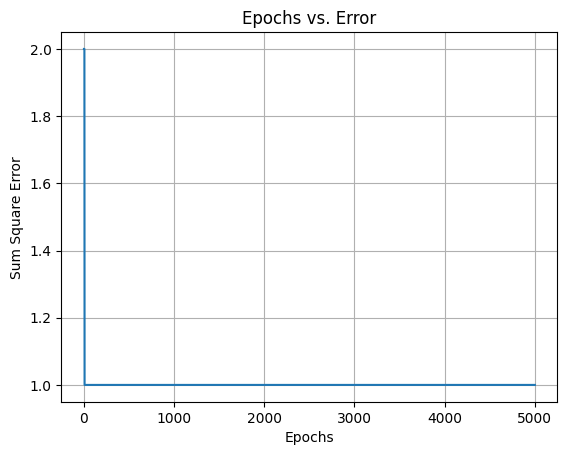

Testing XOR gate logic:
Input: [0 0], Prediction: 1
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 0
Number of epochs needed for convergence: 5000


In [26]:
'''A4. Repeat the above exercises, A1 to A3, for XOR gate logic.'''


bias = 1
w1 = 0.2
w2 = -0.75
learning_rate = 0.05


def step_activation(y):
    return 1 if y >= 0 else 0

def train_perceptron(inputs, targets, weights, bias, learning_rate, max_epochs, convergence_threshold):
    error_history = [] 
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(inputs)):
            weighted_sum = bias + weights[0] * inputs[i][0] + weights[1] * inputs[i][1]
            prediction = step_activation(weighted_sum)
            error = targets[i] - prediction
            total_error += error ** 2
            weights[0] += learning_rate * error * inputs[i][0]
            weights[1] += learning_rate * error * inputs[i][1]
        error_history.append(total_error)
        if total_error <= convergence_threshold:
            break
    return error_history

xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_outputs = np.array([0, 1, 1, 0])

weights = [w1, w2]

convergence_threshold = 0.002
max_epochs = 5000

error_history = train_perceptron(xor_inputs, xor_outputs, weights, bias, learning_rate, max_epochs, convergence_threshold)

plt.plot(range(1, len(error_history) + 1), error_history)
plt.xlabel('Epochs')
plt.ylabel('Sum Square Error')
plt.title('Epochs vs. Error')
plt.grid(True)
plt.show()

print("Testing XOR gate logic:")
for i in range(len(xor_inputs)):
    weighted_sum = bias + weights[0] * xor_inputs[i][0] + weights[1] * xor_inputs[i][1]
    prediction = step_activation(weighted_sum)
    print(f"Input: {xor_inputs[i]}, Prediction: {prediction}")

print(f"Number of epochs needed for convergence: {len(error_history)}")



In [27]:
'''A5. Use customer data provided below. Build a perceptron & learn to classify the transactions as 
high or low value as provided in the below table. Use sigmoid as the activation function. Initialize the 
weights & learning rate with your choice.'''


purchase_data = pd.read_excel('Lab Session1 Data.xlsx',usecols="A:E")

def category(x):
    if x>200:
        return "Yes"
    else:
        return "No"
    
purchase_data['High Value']=purchase_data['Payment (Rs)'].apply(category)
purchase_data['High Value']=purchase_data['High Value'].map({'Yes':1,'No':0})

#Perceptron
w1 = 10
w2 = 1
w3= 1
w4 = 100
bias = 1
learning_rate = 0.5


def step_activation(y):
    return (1 // (1 + (math.e)**(-y)))

def train_perceptron(inputs, targets, weights, bias, learning_rate, max_epochs, convergence_threshold):
    error_history = [] 
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(inputs)):
            weighted_sum = bias + weights[0] * inputs[i][0] + weights[1] * inputs[i][1]
            prediction = step_activation(weighted_sum)
            error = targets[i] - prediction
            total_error += error ** 2
            weights[0] += learning_rate * error * inputs[i][0]
            weights[1] += learning_rate * error * inputs[i][1]
        error_history.append(total_error)
        if total_error <= convergence_threshold:
            break
    return error_history

inputs = np.array(purchase_data.iloc[:,1:5])
targets = np.array(purchase_data['High Value'])

weights = [w1, w2,w3,w4]

convergence_threshold = 0.002
max_epochs = 1000

error_history = train_perceptron(inputs, targets, weights, bias, learning_rate, max_epochs, convergence_threshold)


print("Testing purchase data:")
for i in range(len(inputs)):
    weighted_sum = bias + weights[0] * inputs[i][0] + weights[1] * inputs[i][1]
    prediction = step_activation(weighted_sum)
    print(f"Input: {inputs[i]}, Prediction: {prediction}")

print(f"Number of epochs needed for convergence: {len(error_history)}")


Testing purchase data:
Input: [ 20   6   2 386], Prediction: 1.0
Input: [ 16   3   6 289], Prediction: 1.0
Input: [ 27   6   2 393], Prediction: 1.0
Input: [ 19   1   2 110], Prediction: 0.0
Input: [ 24   4   2 280], Prediction: 1.0
Input: [ 22   1   5 167], Prediction: 0.0
Input: [ 15   4   2 271], Prediction: 1.0
Input: [ 18   4   2 274], Prediction: 1.0
Input: [ 21   1   4 148], Prediction: 0.0
Input: [ 16   2   4 198], Prediction: 0.0
Number of epochs needed for convergence: 62


In [28]:
'''A6. Compare the results obtained from above perceptron learning to the ones obtained with matrix pseudo-inverse'''



A = np.array(purchase_data.iloc[:, 1:4])  
C = np.array(purchase_data.iloc[:, 4:5])  
X = np.linalg.pinv(A) @ C
print(f'Cost of each product:\n {X}')

print("\nEnter sample no. of Candies, Mangoes, Milk packets numbers:\n")
S=[]

for i in range(1,4):
    a=int(input())
    b=[]
    b.append(a)
    S.append(b)

Z=X*S
if np.sum(Z)>200:
    print("High value")
else:
    print("No high value")

print("\nThe results obtained from both perceptron learning and matrix pseudo-inverse are same")



Cost of each product:
 [[ 1.]
 [55.]
 [18.]]

Enter sample no. of Candies, Mangoes, Milk packets numbers:



ValueError: invalid literal for int() with base 10: ''

In [ ]:
''''A7. Develop the below Neural Network. Use learning rate (α) = 0.05 with a Sigmoid activation function. Learn the 
weights of the network using back-propagation algorithm to implement above provided AND gate logic. '''



def sigmoid(x):
    return (1 // (1 + (math.e)**(-x)))

def sigmoid_derivative(x):
    return x * (1 - x)

np.random.seed(0) 

W1 = np.random.rand(2, 2) 
W2 = np.random.rand(2, 1) 

b1 = np.random.rand(2, 1) 
b2 = np.random.rand(1, 1) 


alpha = 0.05

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [0], [0], [1]])

for i in range(1000):  

    Z1 = np.dot(X, W1) + b1.T
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2.T
    A2 = sigmoid(Z2)

    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True).T  
    
    W1 -= alpha * dW1
    b1 -= alpha * db1  
    W2 -= alpha * dW2
    b2 -= alpha * db2.T



print("W1 =", W1)
print("b1 =", b1)
print("W2 =", W2)
print("b2 =", b2)


W1 = [[0.5488135  0.71518937]
 [0.60276338 0.54488318]]
b1 = [[0.43758721]
 [0.891773  ]]
W2 = [[0.4236548 ]
 [0.64589411]]
b2 = [[36.76366276]]


In [ ]:
'''A8. Repeat the above A1 experiment for XOR Gate logic. Keep the learning rate & activation function same as A1.
'''
def sigmoid(x):
    return (1 // (1 + (math.e)**(-x)))

def sigmoid_derivative(x):
    return x * (1 - x)

np.random.seed(0) 

W1 = np.random.rand(2, 2) 
W2 = np.random.rand(2, 1) 

b1 = np.random.rand(2, 1) 
b2 = np.random.rand(1, 1) 


alpha = 0.05

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

for i in range(1000):  

    Z1 = np.dot(X, W1) + b1.T
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2.T
    A2 = sigmoid(Z2)

    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True).T  
    
    W1 -= alpha * dW1
    b1 -= alpha * db1  
    W2 -= alpha * dW2
    b2 -= alpha * db2.T


print("W1 =", W1)
print("b1 =", b1)
print("W2 =", W2)
print("b2 =", b2)


W1 = [[0.5488135  0.71518937]
 [0.60276338 0.54488318]]
b1 = [[0.43758721]
 [0.891773  ]]
W2 = [[0.4236548 ]
 [0.64589411]]
b2 = [[36.76366276]]


In [ ]:
'''A9. Repeat exercise A1 & A2 with 2 output nodes (as shown below). A zero output of logic gate maps 
to [O1 O2] = [1 0] from output layer while a one output from logic gate maps to [0 1].'''



def sigmoid(x):
    return (1 // (1 + (math.e)**(-x)))

def sigmoid_derivative(x):
    return x * (1 - x)

np.random.seed(0) 

W1 = np.random.rand(2, 2) 
W2 = np.random.rand(2, 2) 

b1 = np.random.rand(2, 1) 
b2 = np.random.rand(2, 1) 


alpha = 0.05

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])

for _ in range(1000):  # number of iterations
    # forward propagation
    Z1 = np.dot(X, W1) + b1.T
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2.T
    A2 = sigmoid(Z2)

    # backward propagation
    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True).T

    # update weights and biases
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2.T

# print final weights and biases after training
print("W1 =", W1)
print("b1 =", b1)
print("W2 =", W2)
print("b2 =", b2)


W1 = [[0.5488135  0.71518937]
 [0.60276338 0.54488318]]
b1 = [[0.96366276]
 [0.38344152]]
W2 = [[0.4236548  0.64589411]
 [0.43758721 0.891773  ]]
b2 = [[36.79172504]
 [36.72889492]]


In [ ]:
''''''

#A10

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

Y_AND = np.array([0, 0, 0, 1])
Y_XOR = np.array([0, 1, 1, 0])

clf_AND = MLPClassifier(hidden_layer_sizes=(2,),  solver='adam', max_iter=2000)
clf_AND.fit(X, Y_AND)

clf_XOR = MLPClassifier(hidden_layer_sizes=(2,),  solver='adam', max_iter=2000)
clf_XOR.fit(X, Y_XOR)

print("AND gate predictions:", clf_AND.predict(X))
print("XOR gate predictions:", clf_XOR.predict(X))




AND gate predictions: [0 0 0 1]
XOR gate predictions: [0 1 1 0]


C:\Users\SNS\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
'''Use the MLPClassifier() function on your project dataset'''

data = pd.read_csv("SolarPrediction.csv")

data['Radiation_Class']=  pd.cut(data['Radiation'], 
                                 bins=[0, 800,  1610], labels=["Low", "High"])

x= data.iloc[:10000,4:9]
y=data['Radiation_Class'].iloc[:10000]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

clf = MLPClassifier(hidden_layer_sizes=(5000,), max_iter=1000)
clf.fit(X_train,y_train)
prediction=clf.predict(X_test)
print(clf.predict(X_test))
print(clf.score(X_test,y_test))
print("Classification Report:\n", classification_report(y_test, prediction))

['Low' 'High' 'Low' ... 'Low' 'Low' 'Low']
0.911
Classification Report:
               precision    recall  f1-score   support

        High       0.56      0.76      0.65       214
         Low       0.97      0.93      0.95      1786

    accuracy                           0.91      2000
   macro avg       0.77      0.84      0.80      2000
weighted avg       0.93      0.91      0.92      2000

